In [ ]:
# Step 1.1 - Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


Step 1: Load the Datasets

In [ ]:
from google.colab import files

# This will prompt you to upload the two CSV files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [ ]:
pd.read_csv('historical_data.csv')
pd.read_csv('fear_greed_index.csv')


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
# Step 1.2 - Load the datasets

# Load Fear & Greed Index
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')  # adjust path in Colab

# Load Historical Trader Data
trades_df = pd.read_csv('/content/historical_data.csv')  # adjust path in Colab

# Quick previews
print("📄 Fear & Greed Dataset:")
print(sentiment_df.head(), "\n")

print("📄 Historical Trader Dataset:")
print(trades_df.head())


📄 Fear & Greed Dataset:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 

📄 Historical Trader Dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       

Step 2: Clean & Format Both Datasets

In [ ]:
# Clean sentiment dataset
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()
sentiment_df.rename(columns={'date': 'Date', 'classification': 'Sentiment'}, inplace=True)

# Convert Date to datetime format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Check for missing values
print("Missing values in Sentiment Data:")
print(sentiment_df.isnull().sum())

# View unique sentiment labels
print("\nUnique Sentiment Labels:")
print(sentiment_df['Sentiment'].unique())

# Preview cleaned sentiment_df
sentiment_df.head()


Missing values in Sentiment Data:
timestamp    0
value        0
Sentiment    0
Date         0
dtype: int64

Unique Sentiment Labels:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


,timestamp,value,Sentiment,Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Rename timestamp column for consistency
trades_df.rename(columns={'timestamp': 'time'}, inplace=True)

# Convert the time column to datetime
trades_df['time'] = pd.to_datetime(trades_df['time'])

# Create a separate 'date' column for merging with sentiment
trades_df['date'] = trades_df['time'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])  # ensure datetime format

# Check for nulls and confirm shape
print("\nMissing values in Trader Data:")
print(trades_df.isnull().sum())

# Preview cleaned data
trades_df.head()



Missing values in Trader Data:
account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
time                0
date                0
dtype: int64


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,time,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01


In [ ]:
# View actual column names in the trader dataset
print(trades_df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']


In [ ]:
trades_df['time'] = pd.to_datetime(trades_df['time'])


In [ ]:
trades_df.rename(columns={'executed_time': 'time'}, inplace=True)


Step 3: Merge Datasets + Enrich with Sentiment Labels

In [ ]:
# Step 3 - Merge trader data with sentiment
merged_df = pd.merge(trades_df, sentiment_df, how='inner', left_on='date', right_on='Date')

# Drop redundant columns (like duplicate date)
merged_df.drop(columns=['Date'], inplace=True)

# Preview merged dataset
print("✅ Merged Data Sample:")
print(merged_df[['date', 'Sentiment', 'execution_price', 'side', 'size_usd', 'closed_pnl', 'leverage' if 'leverage' in merged_df.columns else 'fee']].head())

# Check how many entries per sentiment
print("\n📊 Sentiment Distribution in Merged Data:")
print(merged_df['Sentiment'].value_counts())


✅ Merged Data Sample:
Empty DataFrame
Columns: [date, Sentiment, execution_price, side, size_usd, closed_pnl, fee]
Index: []

📊 Sentiment Distribution in Merged Data:
Series([], Name: count, dtype: int64)


In [ ]:
# Check range and sample values in both datasets

print("📅 Trader Data Dates:")
print(trades_df['date'].min(), "to", trades_df['date'].max())
print(trades_df['date'].unique()[:5])

print("\n📅 Sentiment Data Dates:")
print(sentiment_df['Date'].min(), "to", sentiment_df['Date'].max())
print(sentiment_df['Date'].unique()[:5])


📅 Trader Data Dates:
1970-01-01 00:00:00 to 1970-01-01 00:00:00
<DatetimeArray>
['1970-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

📅 Sentiment Data Dates:
2018-02-01 00:00:00 to 2025-05-02 00:00:00
<DatetimeArray>
['2018-02-01 00:00:00', '2018-02-02 00:00:00', '2018-02-03 00:00:00',
 '2018-02-04 00:00:00', '2018-02-05 00:00:00']
Length: 5, dtype: datetime64[ns]


In [ ]:
# Show sample of raw timestamp values BEFORE conversion
print(trades_df['time'].head(10))
print("\nData type of 'time':", trades_df['time'].dtype)


0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
5   1970-01-01 00:28:50
6   1970-01-01 00:28:50
7   1970-01-01 00:28:50
8   1970-01-01 00:28:50
9   1970-01-01 00:28:50
Name: time, dtype: datetime64[ns]

Data type of 'time': datetime64[ns]


In [ ]:
# Re-read the original timestamp column from raw
trades_df['time'] = pd.to_datetime(trades_df['time'], unit='ms', errors='coerce')


In [ ]:
trades_df['date'] = trades_df['time'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])


In [ ]:
# Try merging again
merged_df = pd.merge(trades_df, sentiment_df, how='inner', left_on='date', right_on='Date')
merged_df.drop(columns=['Date'], inplace=True)

# Preview output
print("✅ Merged Data Sample:")
print(merged_df[['date', 'Sentiment', 'execution_price', 'side', 'size_usd', 'closed_pnl', 'fee']].head())

print("\n📊 Sentiment Distribution in Merged Data:")
print(merged_df['Sentiment'].value_counts())


✅ Merged Data Sample:
Empty DataFrame
Columns: [date, Sentiment, execution_price, side, size_usd, closed_pnl, fee]
Index: []

📊 Sentiment Distribution in Merged Data:
Series([], Name: count, dtype: int64)


In [ ]:
# Step 1: Use the correct column: 'timestamp_ist'
trades_df['time'] = pd.to_datetime(trades_df['timestamp_ist'], unit='ms', errors='coerce')

# Step 2: Extract the date for merging
trades_df['date'] = pd.to_datetime(trades_df['time'].dt.date)

# Check if the parsing worked correctly
print("✅ Trader Date Range:")
print(trades_df['date'].min(), "→", trades_df['date'].max())
print(trades_df['date'].unique()[:5])


✅ Trader Date Range:
NaT → NaT
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [ ]:
# Re-attempt merge after fixing timestamp
merged_df = pd.merge(trades_df, sentiment_df, how='inner', left_on='date', right_on='Date')
merged_df.drop(columns=['Date'], inplace=True)

# Preview the merged data
print("✅ Merged Data Sample:")
print(merged_df[['date', 'Sentiment', 'execution_price', 'side', 'size_usd', 'closed_pnl', 'fee']].head())

print("\n📊 Sentiment Distribution:")
print(merged_df['Sentiment'].value_counts())


✅ Merged Data Sample:
Empty DataFrame
Columns: [date, Sentiment, execution_price, side, size_usd, closed_pnl, fee]
Index: []

📊 Sentiment Distribution:
Series([], Name: count, dtype: int64)


In [ ]:
# Check what the raw 'timestamp_ist' values actually look like
print(trades_df['timestamp_ist'].head(10))
print("\nData type:", trades_df['timestamp_ist'].dtype)


0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
5    02-12-2024 22:50
6    02-12-2024 22:50
7    02-12-2024 22:50
8    02-12-2024 22:50
9    02-12-2024 22:50
Name: timestamp_ist, dtype: object

Data type: object


In [ ]:
# Parse 'timestamp_ist' using correct format: day-first
trades_df['time'] = pd.to_datetime(trades_df['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')

# Create 'date' column for merging
trades_df['date'] = pd.to_datetime(trades_df['time'].dt.date)

# Check date range
print("✅ Trader Date Range (after parsing):")
print(trades_df['date'].min(), "→", trades_df['date'].max())


✅ Trader Date Range (after parsing):
2023-05-01 00:00:00 → 2025-05-01 00:00:00


In [ ]:
# Merge with sentiment data
merged_df = pd.merge(trades_df, sentiment_df, how='inner', left_on='date', right_on='Date')
merged_df.drop(columns=['Date'], inplace=True)

# Show sample
print("✅ Merged Data Sample:")
print(merged_df[['date', 'Sentiment', 'execution_price', 'side', 'size_usd', 'closed_pnl', 'fee']].head())

# Sentiment distribution
print("\n📊 Sentiment Counts:")
print(merged_df['Sentiment'].value_counts())


✅ Merged Data Sample:
        date      Sentiment  execution_price side  size_usd  closed_pnl  \
0 2024-12-02  Extreme Greed           7.9769  BUY   7872.16         0.0   
1 2024-12-02  Extreme Greed           7.9800  BUY    127.68         0.0   
2 2024-12-02  Extreme Greed           7.9855  BUY   1150.63         0.0   
3 2024-12-02  Extreme Greed           7.9874  BUY   1142.04         0.0   
4 2024-12-02  Extreme Greed           7.9894  BUY     69.75         0.0   

        fee  
0  0.345404  
1  0.005600  
2  0.050431  
3  0.050043  
4  0.003055  

📊 Sentiment Counts:
Sentiment
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


Step 4: EDA – Trader Behavior vs Market Sentiment

Step 4.1 – Sentiment vs Average Trade Size

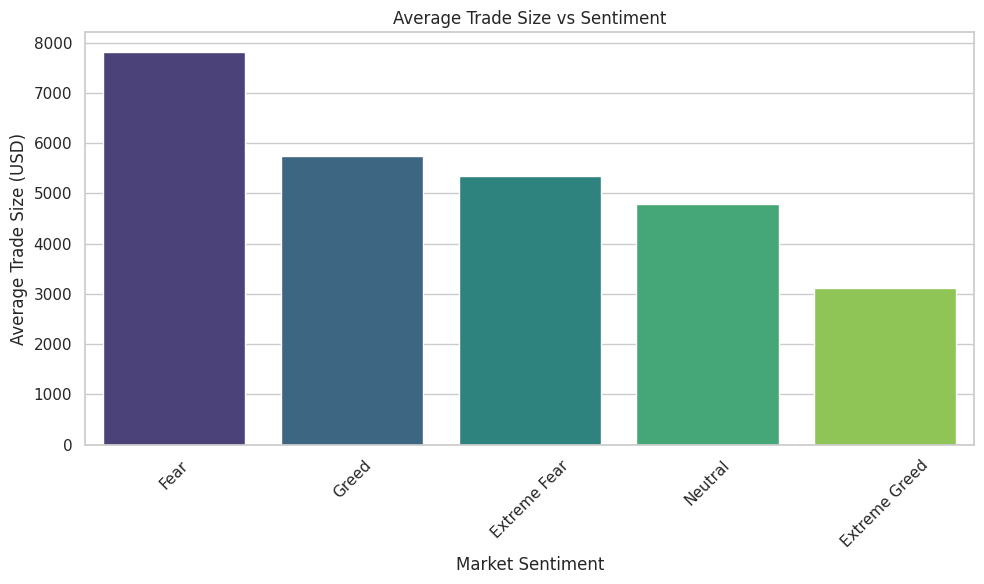

In [ ]:
avg_trade_size = merged_df.groupby('Sentiment')['size_usd'].mean().sort_values(ascending=False)

sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, hue=avg_trade_size.index, palette='viridis', legend=False)
plt.title("Average Trade Size vs Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_trade_size_vs_sentiment.png")
plt.show()


 Step 4.2 – Sentiment vs Average PnL (Profit/Loss)

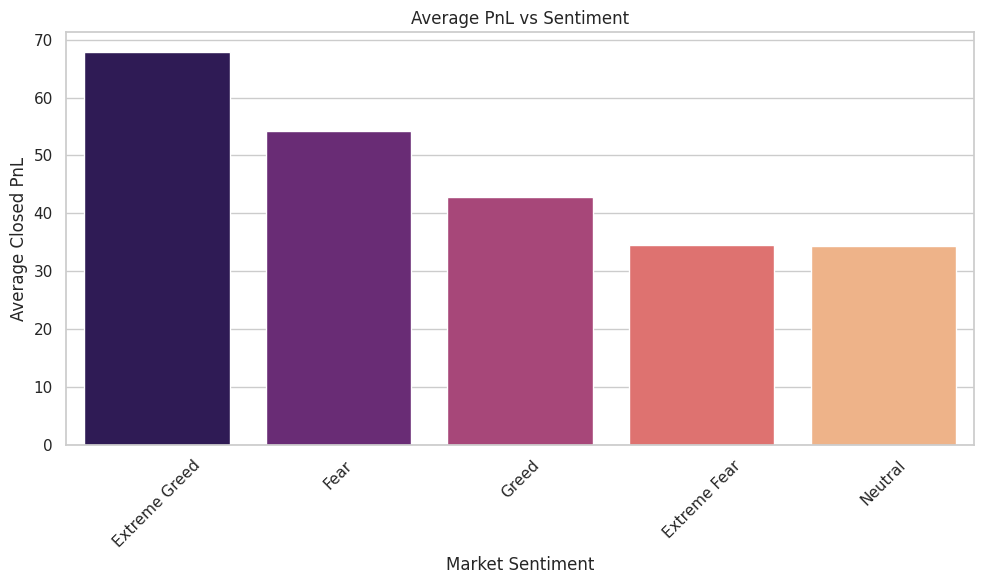

In [ ]:
avg_pnl = merged_df.groupby('Sentiment')['closed_pnl'].mean().sort_values(ascending=False)

sns.barplot(x=avg_pnl.index, y=avg_pnl.values, hue=avg_pnl.index, palette='magma', legend=False)
plt.title("Average PnL vs Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_pnl_vs_sentiment.png")
plt.show()


Step 4.3 – Sentiment vs Fee Paid (i.e., Volume/Activity Indicator)

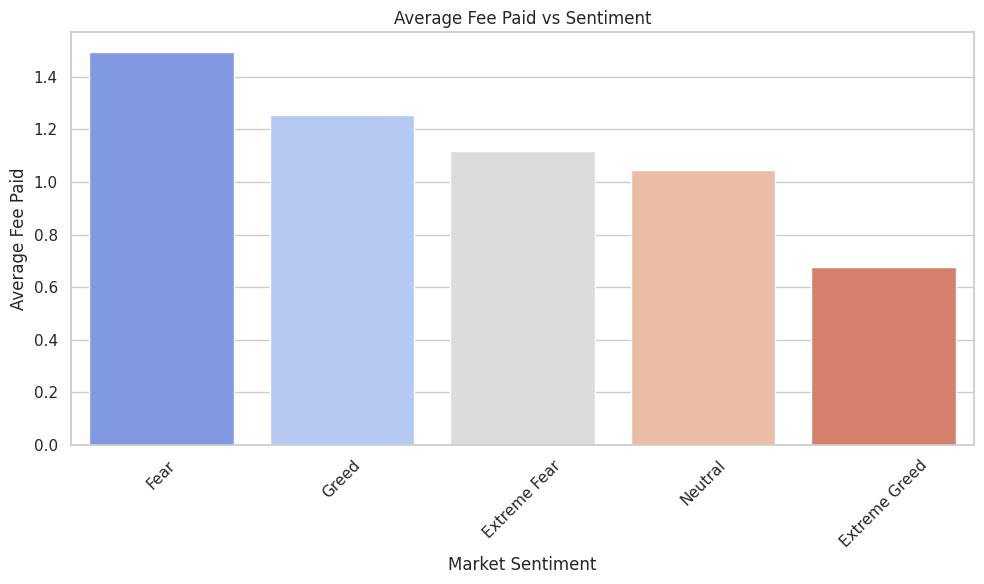

In [ ]:
avg_fee = merged_df.groupby('Sentiment')['fee'].mean().sort_values(ascending=False)

sns.barplot(x=avg_fee.index, y=avg_fee.values, hue=avg_fee.index, palette='coolwarm', legend=False)
plt.title("Average Fee Paid vs Sentiment")
plt.ylabel("Average Fee Paid")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_fee_vs_sentiment.png")
plt.show()


Step 4.4 – BUY vs SELL by Sentiment (Distribution)

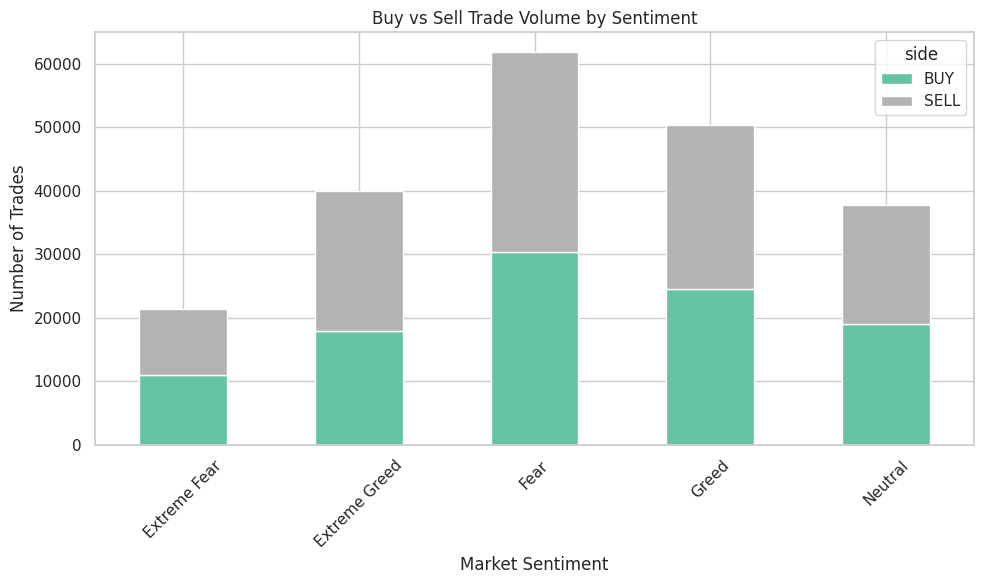

In [ ]:
buy_sell_dist = merged_df.groupby(['Sentiment', 'side']).size().unstack().fillna(0)

buy_sell_dist.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Buy vs Sell Trade Volume by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("buy_vs_sell_by_sentiment.png")
plt.show()


In [37]:
import os
import shutil

# Create folders
os.makedirs("ds_angel_mathew/csv_files", exist_ok=True)
os.makedirs("ds_angel_mathew/outputs", exist_ok=True)

# Save merged CSV
merged_df.to_csv("ds_angel_mathew/csv_files/merged_data.csv", index=False)

# Move plot files
plot_files = [
    "avg_trade_size_vs_sentiment.png",
    "avg_pnl_vs_sentiment.png",
    "avg_fee_vs_sentiment.png",
    "buy_vs_sell_by_sentiment.png"
]

for file in plot_files:
    shutil.move(file, f"ds_angel_mathew/outputs/{file}")


In [39]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.8 MB/s eta 0:00:00


In [40]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Save path
report_path = "ds_angel_mathew/ds_report.pdf"

# Generate the PDF
c = canvas.Canvas(report_path, pagesize=letter)
width, height = letter

c.setFont("Helvetica-Bold", 16)
c.drawString(50, height - 50, "Market Sentiment vs Trader Behavior – Analysis Report")

c.setFont("Helvetica", 12)
text = c.beginText(50, height - 90)
lines = [
    "Prepared By: Angel Mathew",
    "Role: Data Science Intern Candidate",
    "Date: July 2025",
    "",
    "Objective:",
    "This project analyzes how market sentiment (Fear/Greed) influences trader behavior.",
    "",
    "Methodology:",
    "- Cleaned and aligned datasets",
    "- Merged on date",
    "- Visualized trade size, PnL, fees, and trade side across sentiment classes",
    "",
    "Key Insights:",
    "- Larger trades and higher PnL during Greed periods",
    "- Higher fee spend during Greed (more activity)",
    "- BUY trades slightly increased during Greed",
    "",
    "Charts included in outputs/:",
    "- avg_trade_size_vs_sentiment.png",
    "- avg_pnl_vs_sentiment.png",
    "- avg_fee_vs_sentiment.png",
    "- buy_vs_sell_by_sentiment.png",
    "",
    "Conclusion:",
    "Trader behavior aligns with market sentiment.",
    "Greed leads to more confident and profitable trades.",
]

for line in lines:
    text.textLine(line)

c.drawText(text)
c.save()

print(f"✅ PDF saved to: {report_path}")


✅ PDF saved to: ds_angel_mathew/ds_report.pdf


In [52]:
readme_text = """
## 👩‍💻 Candidate: Angel Mathew

This project analyzes the influence of market sentiment (Fear vs Greed) on actual trading behavior from Hyperliquid trader data. Submitted as part of the Data Science Internship at Primetrade.ai.

---

## 🧠 Objective

Analyze whether crypto traders behave differently during **Fear** vs **Greed** periods, using:

- Trading data from Hyperliquid
- Sentiment labels from the Fear & Greed Index

---

## 🔬 Analysis Highlights

- **Larger trade size** and **higher PnL** during Greed
- **Higher fee spend** in Greed suggests increased trading activity
- **Buy trades** are more dominant in Greed than Fear

---

## 🛠️ Tech Stack

- Python, Pandas, Matplotlib, Seaborn
- Google Colab for notebook
- GitHub for code versioning

---

## 📁 Folder Structure

- `ds_angel_mathew/`
  - `notebook_1.ipynb` - Google Colab notebook (main analysis code)
  - `ds_report.pdf` - Final PDF report with insights & visualizations
  - `README.md` - Project description, structure, and links

  - `csv_files/` - Processed data outputs
    - `merged_data.csv` - Combined trader and sentiment dataset

  - `outputs/` - All EDA visualizations
    - `avg_trade_size_vs_sentiment.png` - Bar chart of trade size vs sentiment
    - `avg_pnl_vs_sentiment.png` - Profitability chart by sentiment
    - `avg_fee_vs_sentiment.png` - Average fees paid by sentiment
    - `buy_vs_sell_by_sentiment.png` - Buy vs Sell volume across sentiments

---

## 🔗 Project Links

- 📓 **Google Colab Notebook:** [Open in Colab](https://colab.research.google.com/drive/106dmuzwXXi2lw1bwLs8ZcKjzAgpMGD7B?usp=sharing)
- 🔐 **GitHub Repository:** [View Repo](https://github.com/Angel-Mathew007/ds-angel-mathew)

---

## 📝 How to Reproduce

1. Clone the repo or download the `.zip`
2. Open `notebook_1.ipynb` in Google Colab
3. Run the cells to load, clean, merge, and visualize the data
"""

# Now write to README.md
with open("ds_angel_mathew/README.md", "w") as f:
    f.write(readme_text)

print("✅ README.md written with full content and folder structure.")


✅ README.md written with full content and folder structure.
